<a href="https://colab.research.google.com/github/supremeKAI40/PulsarDataPlotting/blob/main/XRay_Emission_Profiles_Pulsars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PSRJ2022+3842 Data from ATNF


1. Right Ascension (J2000): 20:22:21.689 or in degree: 305.59037
2. Declination (J2000): +38:42:14.82 or in degree:38.704117
3. Galactic Longitude/Latitude: 76.888/0.960
4. Period (P): 0.048578779636 
5. Period Derivative: 8.61E-14 
6. Frequency: 20.585119830
7. Frequency Derivative: -3.648E-11
8. Epoch of timing solution (PEPOCH): 55666.2378
9. Dispersion Measure (DM): 429.1
10. DM distance: 13.154
11. Characteristic Age: 8.94e+03
12. Spin-down power: 3.0e+37
13. Surface Magnetic Field: 2.07e+12

In [ ]:
import numpy as np

In [ ]:
events=np.loadtxt('/content/PNsspec_500assy2.dat')

In [32]:
print(events.size)

9755


In [33]:
t0= 4877
print("Event index assigned phase 0: {}".format(t0))

Event index assigned phase 0: 4877


In [80]:
#Frequency: 20.585119830
#Frequency Derivative: -3.648E-11
#Trial Frequencies
f0=20.585119830
f1=-3.648E-11

In [81]:
#We would assign phase of events[t0]=0.0
#Add f1 value for better accuracy of taylor series expansion
def trial_phase(events,f0):
    middle= events[t0]
    phi0=0.0
    phi= np.empty_like(events)
    for i in range(events.size):
        phi[i]= phi0 + f0*(events[i]-middle)+0.5*f1*(events[i]-middle)**2
    return phi

In [82]:
phase= trial_phase(events,f0)
print(phase.size)

9755


In [83]:
#Deriving fractional phases 
def frac_phase(phaseArr):
    fracphase= np.empty_like(phaseArr)
    for j in range(phaseArr.size):
        if (phaseArr[j]>0):
            fracphase[j]= phaseArr[j]-int(phaseArr[j])
        elif(phaseArr[j]<0):
            fracphase[j]= phaseArr[j]- int(phaseArr[j]-1)
        else:
            fracphase[j]=phaseArr[j]
    return fracphase

In [84]:
phaseNorm= frac_phase(phase)
print(phaseNorm[phaseNorm==0])

[0.]


In [85]:
#Z_test for derived phase values
def Z_test(phasefraction, n):
    N = len(phasefraction)
    z2=0
    for k in range(1,n+1):
        term1=0
        term2=0
        for j in range(1, (N+1)):
            term1 += np.cos(k*phasefraction[j-1])
            term2 += np.sin(k*phasefraction[j-1])
        z2 += np.square(term1)+ np.square(term2)
    Z= z2*2/N
    return Z

In [86]:
Z2= Z_test(phaseNorm,2)
Z1= Z_test(phaseNorm, 1)
print(Z1, Z2)

17889.576896384027 31537.897133065926


In [88]:
def freq (v,r,step,n,events):
    start= v-r
    end= v+r
    vRange= np.arange(start,end, step)
    zArr = np.empty_like(vRange)
    print("size of vrange ={}".format(vRange.size))
    for v in range(vRange.size):
        p= trial_phase(events,vRange[v])
        pFrac= frac_phase(p)
        Zstat = Z_test(pFrac, n)
        zArr[v]= Zstat
    return vRange, zArr    

In [89]:
freqArr1, zArray1= freq(f0,0.01,1e-5,1,events)
freqArr2, zArray2= freq(f0,0.01,1e-5,2,events)

size of vrange =2001
size of vrange =2001


In [90]:
print(np.argmax(zArray1),np.argmax(zArray2))

292 292


In [91]:
print(zArray1[292], freqArr1[292])
print(zArray2[292], freqArr2[292])

17979.734096782922 20.578039829999888
31935.735367253706 20.578039829999888


In [125]:
freqArr11, zArray11= freq(freqArr1[292],0.00001,1e-8,1,events)

size of vrange =2000


In [126]:
print(np.argmax(zArray11))
print(zArray11[np.argmax(zArray11)], freqArr11[np.argmax(zArray11)])

996
17979.906006267775 20.578039430001052


In [117]:
import matplotlib.pyplot as plt

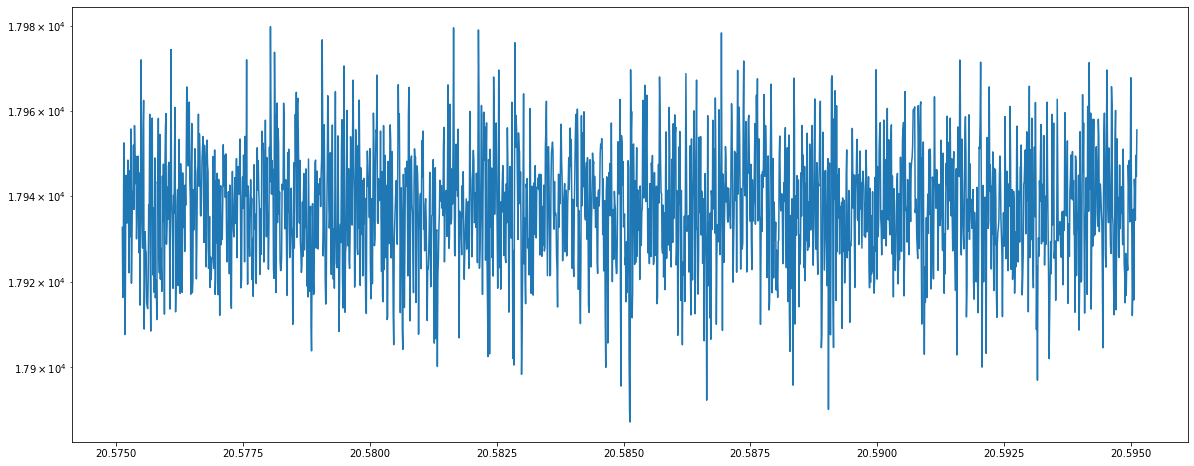

In [112]:
plt.figure(figsize=(20,8))
plt.plot(freqArr1,zArray1, scaley=True)
plt.yscale('log')
plt.show()

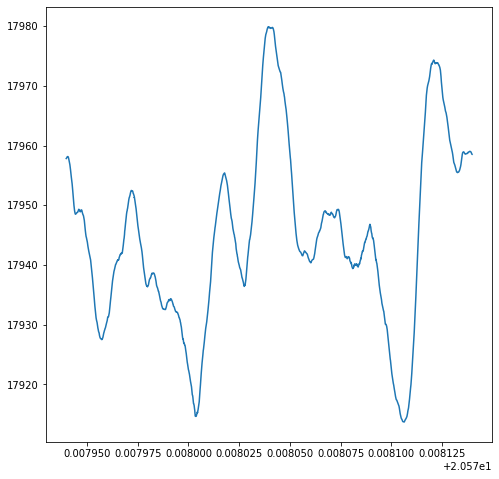

In [134]:
plt.figure(figsize=(8,8))
plt.errorbar(freqArr11,zArray11,yerr = 0.0001)
plt.show()

In [136]:
freqArr111, zArray111= freq(f0,0.00001,1e-8,1,events)

size of vrange =2000


In [137]:
freqArr10, zArray10= freq(f0,0.0001,1e-8,1,events)

size of vrange =20000


In [144]:
print(np.argmax(zArray111))
print(np.argmax(zArray10))
print(zArray111[np.argmax(zArray111)], freqArr111[np.argmax(zArray111)])
print(zArray10[np.argmax(zArray10)], freqArr10[np.argmax(zArray10)])

0
12163
17902.355972235764 20.58510983
17974.303846534298 20.585141460010064


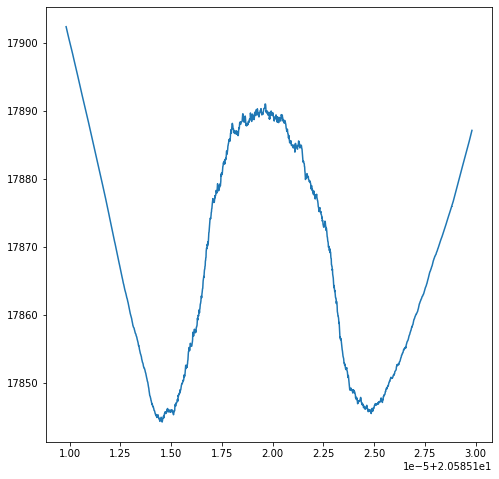

In [139]:
plt.figure(figsize=(8,8))
plt.errorbar(freqArr111,zArray111,yerr = 0.0001)
plt.show()

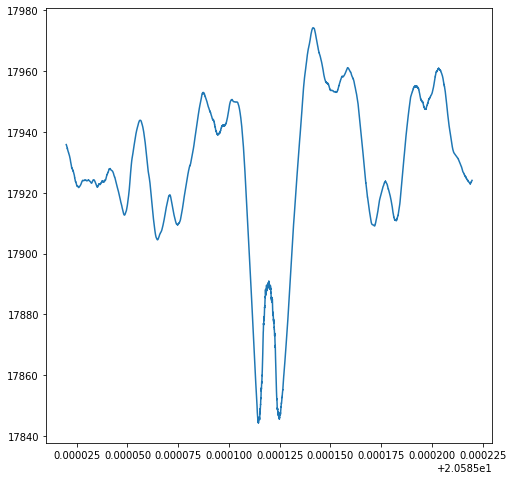

In [176]:
plt.figure(figsize=(8,8))
plt.errorbar(freqArr10,zArray10)
#plt.errorbar(freqArr111,zArray111)
#plt.errorbar(freqArr1,zArray1)
plt.show()

In [161]:
phaseActual=trial_phase(events,20.585141460010064)

In [166]:
phaseActualNorm= frac_phase(phaseActual)
print(phaseActualNorm.size)

9755


In [167]:
arr=np.arange(0,9755)
arr

array([   0,    1,    2, ..., 9752, 9753, 9754])

(array([111.,  88.,  76.,  88.,  97.,  93., 111.,  94.,  92.,  93.,  94.,
         98.,  93.,  87.,  94.,  93.,  97.,  93.,  95.,  69., 112., 119.,
        101.,  93.,  86., 101., 114., 111., 105., 101.,  99.,  97., 128.,
        113.,  95., 106.,  97.,  90., 104., 104., 102.,  97.,  92., 101.,
        114., 116.,  96., 105.,  95.,  86., 106.,  83.,  94., 102., 100.,
        118.,  96., 101., 119., 108.,  95., 111.,  98.,  88.,  83.,  88.,
         74.,  94.,  76.,  76.,  86.,  86.,  84., 111., 100., 121., 116.,
        109., 101.,  99.,  98.,  95., 109., 116.,  80.,  90.,  95.,  99.,
         94.,  93., 104.,  94., 101.,  95.,  83.,  90., 101.,  90.,  92.,
         77.]),
 array([0.        , 0.0099989 , 0.0199978 , 0.0299967 , 0.0399956 ,
        0.0499945 , 0.05999341, 0.06999231, 0.07999121, 0.08999011,
        0.09998901, 0.10998791, 0.11998681, 0.12998571, 0.13998461,
        0.14998351, 0.15998242, 0.16998132, 0.17998022, 0.18997912,
        0.19997802, 0.20997692, 0.21997582, 0.

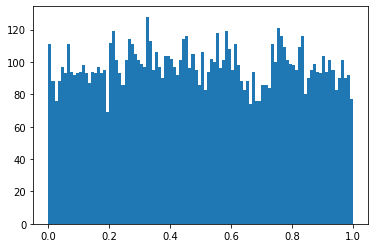

In [170]:
plt.hist(phaseActualNorm,100)